# Predicting White and Red Wine using ANN

Importing the ncessary libraries.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading the files.

In [48]:
white_wine = pd.read_csv('winequality-white.csv', sep=';')
red_wine = pd.read_csv('winequality-red.csv', sep=';') 

Let us check the data types of these columns to determine if they are categorical or numerical.

In [49]:
white_wine.dtypes
red_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [50]:
white_wine.isnull().sum()
red_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Since there are no null values we can go ahead. Let us check the distribution of these datasets.

In [51]:
white_wine.describe()
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Making a few plots to understand trends.

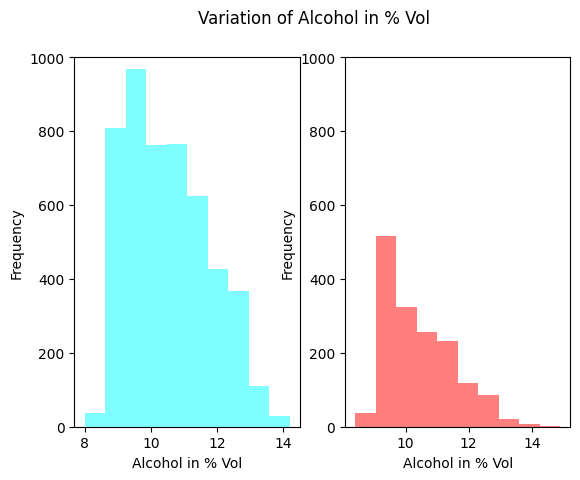

In [52]:
fig, axis = plt.subplots(1, 2) # creating 2 subplots

axis[0].hist(white_wine.alcohol, bins=10, color='cyan', alpha=0.5, label='White wine') # histogram for white wine
axis[1].hist(red_wine.alcohol, bins=10, color='red', alpha=0.5, label='Red wine') # histogram for red wine

axis[0].set_xlabel('Alcohol in % Vol') 
axis[0].set_ylabel('Frequency')
axis[0].set_ylim([0, 1000])

axis[1].set_xlabel('Alcohol in % Vol') 
axis[1].set_ylabel('Frequency')
axis[1].set_ylim([0, 1000])

fig.suptitle('Variation of Alcohol in % Vol') # providing the title for the figure
plt.show()

Create a column for the type of wine to be able to recognize.

In [53]:
white_wine['type'] = 0
red_wine['type'] = 1

In [54]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [55]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


Mergine the two datasets.

In [56]:
wines_merged = pd.concat([white_wine, red_wine]) # merging the two data frames
wines_merged.reset_index(drop=True, inplace=True) # resetting the index
wines_merged

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


Splitting the dataset into training and testing components.

In [58]:
from sklearn.model_selection import train_test_split

x = wines_merged.drop(columns=['type'])
y = wines_merged['type']  

x_test, x_train, y_test, y_train = train_test_split(x, y, test_size=0.3, random_state=42)

Building the structure of the Neural Network

In [61]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

wine_model = Sequential() # creating a sequential model
wine_model.add(Dense(12, activation='relu', input_shape=(12,))) # input layer
wine_model.add(Dense(9, activation='relu')) # hidden layer
wine_model.add(Dropout(0.5)) # dropout layer
wine_model.add(Dense(1, activation='sigmoid')) # output layer

wine_model.output_shape # output shape of the model
wine_model.summary() # summary of the model
wine_model.get_config() # configuration of the model

wine_model.get_weights() # weights of the model
wine_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # compiling the model


c:\Users\arkha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 9)              │           117 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 9)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 283 (1.11 KB)

 Trainable params: 283 (1.11 KB)

 Non-trainable params: 0 (0.00 B)

Training the model

In [62]:
wine_model.fit(x_train, y_train, epochs=20, batch_size=1, verbose=1) # fitting the model

predictions = wine_model.predict(x_test) # making predictions on the testing input

Epoch 1/20
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 2s 542us/step - accuracy: 0.7458 - loss: 5.5666
Epoch 2/20
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 1s 505us/step - accuracy: 0.8691 - loss: 0.4006
Epoch 3/20
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 1s 491us/step - accuracy: 0.8781 - loss: 0.3809
Epoch 4/20
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 1s 485us/step - accuracy: 0.8836 - loss: 0.3364
Epoch 5/20
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 1s 497us/step - accuracy: 0.8932 - loss: 0.3165
Epoch 6/20
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 1s 478us/step - accuracy: 0.8893 - loss: 0.3249
Epoch 7/20
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 1s 463us/step - accuracy: 0.8913 - loss: 0.3124
Epoch 8/20
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 1s 458us/step - accuracy: 0.8754 - loss: 0.3526
Epoch 9/20
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 1s 463us/step - accuracy: 0.8858 - loss: 0.3264
Epoch 10/20
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 1s 465us/step - accuracy: 0.8813 - loss: 0.3372
Epoch 11/20
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 1s 462us/step - accuracy: 0.8974 - loss: 0.2993
Epoch 12

Let us check the performance of the model using metrics.

In [63]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2_val = r2_score(y_test, predictions) # R-squared value
m_a_e = mean_absolute_error(y_test, predictions) # mean absolute error
m_s_e = mean_squared_error(y_test, predictions) # mean squared error

print(f"The r2 score of the model is {r2_val}")
print(f"The mean absolute error of the model is {m_a_e}")
print(f"The mean squared error of the model is {m_s_e}")

The r2 score of the model is 0.8153829770845998
The mean absolute error of the model is 0.1180626982119453
The mean squared error of the model is 0.034314309785717055


These metrics show that the model is performing well!